## Sampling-Importance Resampling Example

This notebook is an example of the sampling-importance resampling method to draw from a target distribution $p(x)$ for which we only (may) know its kernel.

Target density $p(x)$ is a mixture of gaussians:

\begin{equation}
    p(x) = \eta N(\mu_1,\sigma_1^2) + (1-\eta) N(\mu_2,\sigma_2^2).
\end{equation}


Proposal density $g(x)$ is gaussian:
\begin{equation}
    g(x) = N(\mu_3,\sigma_3^2).
\end{equation}

Kernel of $p(x)$ is: 
\begin{equation}
    p(x) = \eta e^{-0.5 \frac{\left(  x-\mu_1\right)^2}{\sigma_1^2}} + (1-\eta) e^{-0.5 \frac{\left(  x-\mu_2\right)^2}{\sigma_2^2}}.
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# TARGET DISTRIBUTION
mu1, sigma1 = 0, np.sqrt(2.5)
mu2, sigma2 = 10, np.sqrt(2.5)
eta = 0.3

def k(x):
    """Kernel of the mixture distribution."""
    return eta * np.exp(-0.5 * (x - mu1)**2 / sigma1**2) + (1 - eta) * np.exp(-0.5 * (x - mu2)**2 / sigma2**2)

# PROPOSAL DENSITY
mu3, sigma3 = 8, 6
g = lambda x: norm.pdf(x, mu3, sigma3)

In [3]:
# SAMPLING-IMPORTANCE RESAMPLING ALGORITHM

Ndraws = 500000  # Number of draws
xdraws = mu3 + sigma3 * np.random.randn(Ndraws)  # Draws from proposal density
omega = k(xdraws) / g(xdraws)  # Importance weights

# Normalized importance weights to create probabilities of particles
qprob = omega / np.sum(omega)

# Compute cumulative distribution of discrete probability
qcdf = np.cumsum(qprob)

# Draw Mdraw samples from the discrete distribution. 
# Rule of thumb is Mdraws/Ndraws <= (1/10)
Mdraws = round(Ndraws / 10)

# Draw uniform random numbers
uniformSamples = np.random.rand(Mdraws)

idx = np.searchsorted(qcdf, uniformSamples)
samples = xdraws[idx]


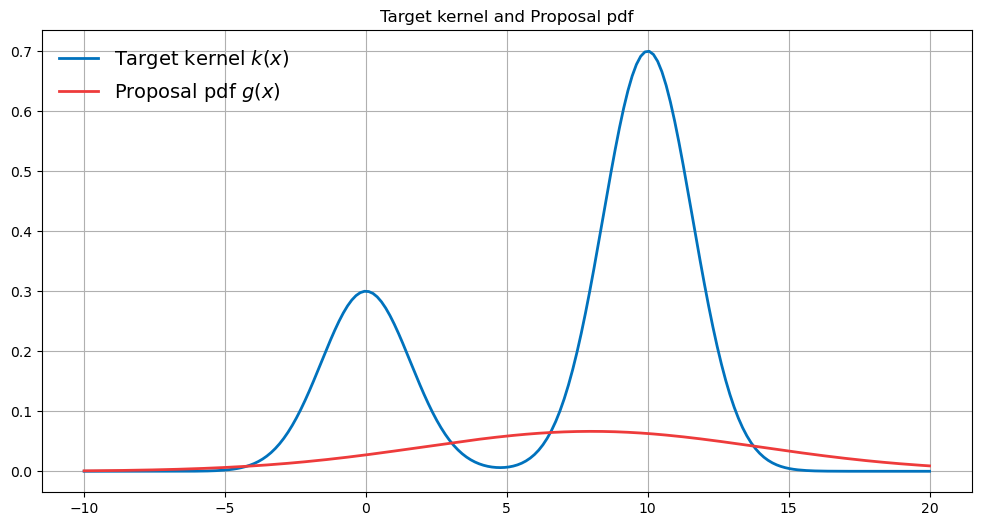

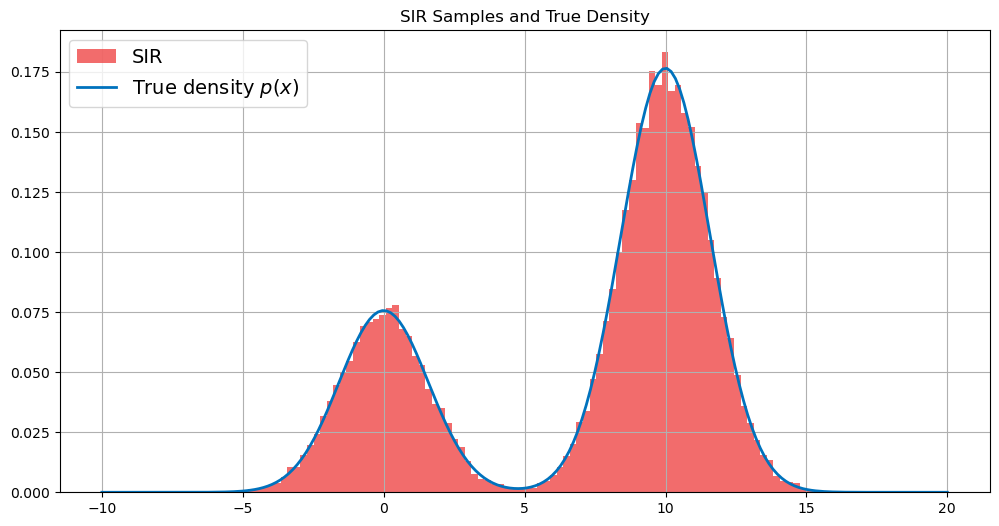

In [4]:
# MAKE PLOTS

# Colors
colors = {
    "color1": [0, 0.4470, 0.7410],
    "color2": [0.8500, 0.3250, 0.0980],
    "color3": [0.9290, 0.6940, 0.1250],
    "color4": [0.4940, 0.1840, 0.5560],
    "color5": [0.4660, 0.6740, 0.1880],
    "color6": [0.3010, 0.7450, 0.9330],
    "color7": [0.6350, 0.0780, 0.1840],
    "color8": [238/255, 59/255, 59/255]  # brown2 #ee3b3b
}

xlow, xhig = -10, 20
N = 200
xvec = np.linspace(xlow, xhig, N)
kvec = k(xvec)
gvec = g(xvec)


# PLOT KERNEL AND PROPOSAL DENSITY 
plt.figure(figsize=(12, 6))
plt.plot(xvec,kvec, linewidth=2, color=colors["color1"], label='Target kernel $k(x)$')
plt.plot(xvec, gvec, linewidth=2, color=colors["color8"], label='Proposal pdf $g(x)$')
plt.grid(True)
plt.legend(loc='upper left',fontsize=14,frameon=False)
plt.title("Target kernel and Proposal pdf")
plt.show()


# PLOT SIR SAMPLES AND TRUE DENSITY
NormalizingConstant = np.sum(omega) / Ndraws
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=100, density=True, alpha=0.75, color=colors["color8"], label='SIR')
plt.plot(xvec, kvec / NormalizingConstant, linewidth=2, color=colors["color1"], label='True density $p(x)$')
plt.grid(True)
plt.legend(loc='upper left', fontsize=14)
plt.title("SIR Samples and True Density")
plt.show()

